In [283]:
# Start with importing the packages
%matplotlib notebook

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE
from   sklearn.preprocessing import StandardScaler
import scipy
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-notebook'
pd.set_option('precision', 2)
pd.set_option('max_columns',10)

In [202]:
#sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [248]:
data_df = pd.read_csv('marker_expression.csv')
print(data_df.shape)
data_df.head()

(439, 29)


,ck5,ck7,ck17,ck18,ck19,...,chra,cd56,cd10,clin_diag,pad
0,0.00,92.5,20.00,92.5,92.5,...,0.0,0.00,0.00,Ductal pancreatic adenocarcinoma,Pancreas Ac|397
1,0.00,20.0,0.00,92.5,50.0,...,0.0,0.00,0.00,Hepatocellular carcinoma,Hepatocellular Cancer|190
2,0.00,92.5,0.00,92.5,92.5,...,2.5,0.00,0.00,Ductal pancreatic adenocarcinoma,Pancreas Ac|25
3,0.71,70.0,18.33,92.5,85.0,...,0.0,10.00,9.17,Gallbladder cancer,Gallbladder Ac|108
4,0.00,0.0,0.00,92.5,40.0,...,0.0,11.56,0.00,Hepatocellular carcinoma,Hepatocellular Cancer|336


In [245]:
#group by clincial diagnosis
#grouped_df = data_df.set_index('clin_diag')
grouped_df = data_df
del grouped_df['pad']
#del grouped_df['clin_diag']

grouped_df


,ck5,ck7,ck17,ck18,ck19,...,smad4,chra,cd56,cd10,clin_diag
0,0.00,92.5,20.00,92.5,92.5,...,0.00,0.0,0.00,0.00,Ductal pancreatic adenocarcinoma
1,0.00,20.0,0.00,92.5,50.0,...,90.00,0.0,0.00,0.00,Hepatocellular carcinoma
2,0.00,92.5,0.00,92.5,92.5,...,70.00,2.5,0.00,0.00,Ductal pancreatic adenocarcinoma
3,0.71,70.0,18.33,92.5,85.0,...,42.50,0.0,10.00,9.17,Gallbladder cancer
4,0.00,0.0,0.00,92.5,40.0,...,58.78,0.0,11.56,0.00,Hepatocellular carcinoma
...,...,...,...,...,...,...,...,...,...,...,...
434,0.00,80.0,60.00,85.0,92.5,...,90.00,5.0,0.00,5.00,Distal bile duct cancer
435,0.00,60.0,30.00,92.5,92.5,...,95.00,0.0,0.00,0.00,Perihilar cholangiocarcinoma
436,50.00,92.5,92.50,92.5,92.5,...,85.00,0.0,0.00,0.00,Ductal pancreatic adenocarcinoma
437,0.00,92.5,0.00,92.5,92.5,...,95.00,0.0,0.00,0.00,Intrahepatic cholangiocarcinoma


In [259]:
# we can create a new dataframe by indexing into an existing dataframe with this column of True's and False's
df_subset = grouped_df[ grouped_df['clin_diag'] == 'Gallbladder cancer' ]

# here are the stats for just the setosa species flowers
df_subset.describe()

,ck5,ck7,ck17,ck18,ck19,...,ki67,smad4,chra,cd56,cd10
count,38.00,38.00,38.00,38.00,38.00,...,38.00,38.00,38.00,38.00,38.00
mean,5.23,76.02,26.22,91.96,90.16,...,40.96,66.61,1.11,4.65,20.74
std,10.81,30.81,30.22,2.09,10.36,...,21.67,33.54,1.92,15.43,29.09
min,0.00,0.00,0.00,80.00,31.00,...,5.00,0.00,0.00,0.00,0.00
25%,0.00,72.50,0.00,92.50,92.50,...,20.00,43.12,0.00,0.00,0.87
50%,0.00,92.50,16.67,92.50,92.50,...,34.86,85.00,0.00,0.00,10.30
75%,5.00,92.50,30.00,92.50,92.50,...,60.00,95.00,1.14,2.80,25.39
max,50.00,92.50,92.50,92.50,92.50,...,85.00,95.00,5.00,92.50,92.50


In [264]:
diagnosis_set = set(grouped_df['clin_diag'])


for diagnosis in diagnosis_set:
    print('stats for diagnosis', diagnosis)
    print(grouped_df[ grouped_df['clin_diag'] == diagnosis].describe())

          ck5     ck7    ck17    ck18   ck19  ...    ki67   smad4    chra  \
count  100.00  100.00  100.00  100.00  100.0  ...  100.00  100.00  100.00   
mean     1.01   10.50    5.96   86.54   16.3  ...   23.79   70.10    0.25   
std      2.66   21.77    8.99   17.17   30.0  ...   17.29   14.47    0.48   
min      0.00    0.00    0.00    5.00    0.0  ...    1.00   47.50    0.00   
25%      0.00    0.00    0.00   92.50    0.0  ...   10.00   58.78    0.00   
50%      0.00    0.00    0.00   92.50    0.0  ...   20.00   58.78    0.00   
75%      0.00    7.50   10.18   92.50   15.0  ...   30.31   85.00    0.00   
max     20.00   92.50   24.38   92.50   92.5  ...   85.00   95.00    1.19   

         cd56    cd10  
count  100.00  100.00  
mean     3.88   14.69  
std     10.87   25.28  
min      0.00    0.00  
25%      0.00    0.00  
50%      0.00    0.00  
75%      4.81   15.00  
max     92.50   92.50  

[8 rows x 27 columns]
         ck5    ck7   ck17   ck18   ck19  ...   ki67  smad4   chra 

In [280]:
summary_df = grouped_df.groupby('clin_diag').describe()
select_markers = summary_df.loc[: , ['ca125' , 'cd56' , 'ck7' , 'muc2' , 'cd10']]
print(select_markers)
select_markers.to_csv('Differentially_Expressed_Markers.csv')

                                    ck7                             ... cd10  \
                                  count   mean    std   min    25%  ...  min   
clin_diag                                                           ...        
Ampullary carcinoma                24.0  59.09  39.44   0.0  16.25  ...  0.0   
Distal bile duct cancer             8.0  83.12  21.91  30.0  89.38  ...  0.0   
Ductal pancreatic adenocarcinoma  143.0  81.93  26.84   0.0  92.50  ...  0.0   
Gallbladder cancer                 38.0  76.02  30.81   0.0  72.50  ...  0.0   
Hepatocellular carcinoma          100.0  10.50  21.77   0.0   0.00  ...  0.0   
Intrahepatic cholangiocarcinoma    98.0  81.18  26.26   0.0  92.50  ...  0.0   
Perihilar cholangiocarcinoma       28.0  69.53  35.31   0.0  63.71  ...  0.0   

                                                             
                                   25%    50%    75%    max  
clin_diag                                                    
Ampullary car

Ductal pancreatic adenocarcinoma    143
Hepatocellular carcinoma            100
Intrahepatic cholangiocarcinoma      98
Gallbladder cancer                   38
Perihilar cholangiocarcinoma         28
Ampullary carcinoma                  24
Distal bile duct cancer               8
Name: clin_diag, dtype: int64


<IPython.core.display.Javascript object>


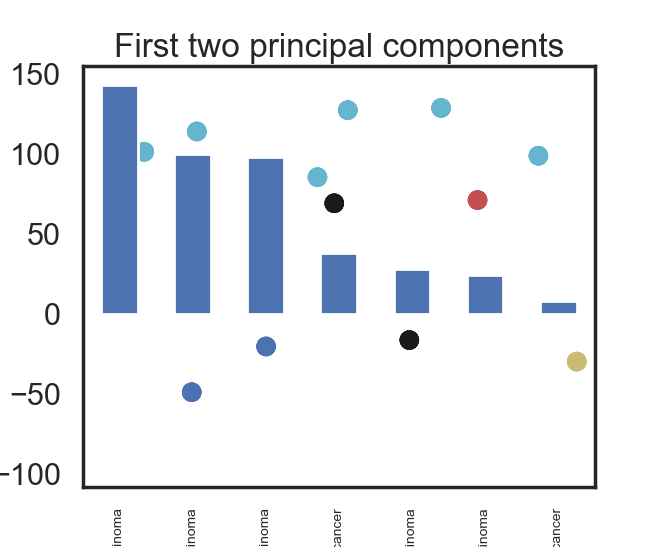

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

In [293]:
df = grouped_df['clin_diag'].value_counts()

print(df)

# this is kind of silly
plt.figure(figsize=(6, 5))
df.plot.bar()
plt.xticks(fontsize=10)

# this saves the silly bar plot to a pngfile named silly_bar.png
#plt.savefig('silly_bar.png')

In [296]:
# Here we are going to set up a dictionary that maps from iris species to plotting colors

set_of_diagnoses = set( grouped_df['clin_diag'] ) # get rid of duplicates in the species column

color_dict = {}

# zip is a useful builtin function that takes two lists/sets/sequences and 
#  lets you loop over them at the same time
# Note how since we are looping over a pair of zipped lists we have two variables after for
#
for diagnosis, color in zip( set_of_diagnoses, 'rgbymck' ):
    print(diagnosis, color)
    color_dict[ diagnosis ] = color
    
print(color_dict)

# note that we don't have any control over which order the species come in:
# compare the output if we add sorted(...) around set
#

Hepatocellular carcinoma r
Gallbladder cancer g
Ductal pancreatic adenocarcinoma b
Ampullary carcinoma y
Distal bile duct cancer m
Intrahepatic cholangiocarcinoma c
Perihilar cholangiocarcinoma k
{'Hepatocellular carcinoma': 'r', 'Gallbladder cancer': 'g', 'Ductal pancreatic adenocarcinoma': 'b', 'Ampullary carcinoma': 'y', 'Distal bile duct cancer': 'm', 'Intrahepatic cholangiocarcinoma': 'c', 'Perihilar cholangiocarcinoma': 'k'}


In [297]:
# now let's use this dictionary to make a new column for the iris dataframe, containing the colors
colors = []
for diagnosis in grouped_df['clin_diag']:
    colors.append(color_dict[diagnosis])

print(colors[:5])


['b', 'r', 'b', 'g', 'r']


In [300]:
grouped_df['color'] = colors 
grouped_df.head()

,ck5,ck7,ck17,ck18,ck19,...,chra,cd56,cd10,clin_diag,color
0,0.00,92.5,20.00,92.5,92.5,...,0.0,0.00,0.00,Ductal pancreatic adenocarcinoma,b
1,0.00,20.0,0.00,92.5,50.0,...,0.0,0.00,0.00,Hepatocellular carcinoma,r
2,0.00,92.5,0.00,92.5,92.5,...,2.5,0.00,0.00,Ductal pancreatic adenocarcinoma,b
3,0.71,70.0,18.33,92.5,85.0,...,0.0,10.00,9.17,Gallbladder cancer,g
4,0.00,0.0,0.00,92.5,40.0,...,0.0,11.56,0.00,Hepatocellular carcinoma,r


In [301]:
X_df = grouped_df.drop(['clin_diag','color'], axis=1)
X_df.shape

(439, 27)

In [313]:
from sklearn.decomposition import PCA # sklearn == scikit-learn package name

# This is the general scikit-learn workflow
# Step 1. create and configure the model:
pca = PCA(n_components=4)

# Step 2. fit the model to the data
pca.fit(X_df)


PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [314]:
print(pca.components_)

[[-0.0197 -0.3505 -0.1448 -0.0149 -0.3213 -0.0159 -0.026  -0.2282 -0.0142
  -0.2203 -0.0295 -0.3344 -0.3342 -0.2349 -0.2231 -0.2448 -0.334  -0.3095
   0.0069 -0.0729 -0.1283 -0.0097 -0.0587  0.1612 -0.0022  0.0234  0.0464]
 [ 0.0107  0.2256 -0.0242  0.0254  0.1994 -0.1155  0.4794  0.3396 -0.0721
  -0.3107  0.0443  0.1818  0.1554 -0.3794 -0.062  -0.1314  0.0295 -0.2406
   0.142  -0.1655 -0.0536  0.0144 -0.0057  0.3285 -0.0062  0.0713 -0.0335]
 [-0.0563  0.032  -0.3316  0.061   0.2105  0.1735 -0.1588 -0.3303  0.109
  -0.0078  0.0865  0.3005  0.1537  0.0854  0.1604 -0.5446  0.0081 -0.0783
  -0.0174  0.3135  0.0908 -0.0746  0.0931  0.2655  0.0121  0.032   0.1073]
 [ 0.02    0.0155  0.0685  0.0178 -0.0383 -0.0076  0.0934 -0.0305 -0.0204
   0.0426  0.0184 -0.0072 -0.0378 -0.0647 -0.1432  0.0403 -0.211  -0.0771
   0.0522  0.0349  0.9294  0.0392  0.1538 -0.0138  0.003  -0.0344 -0.0896]]


In [315]:
X_pca = pca.transform(X_df)
X_pca.shape

(439, 4)

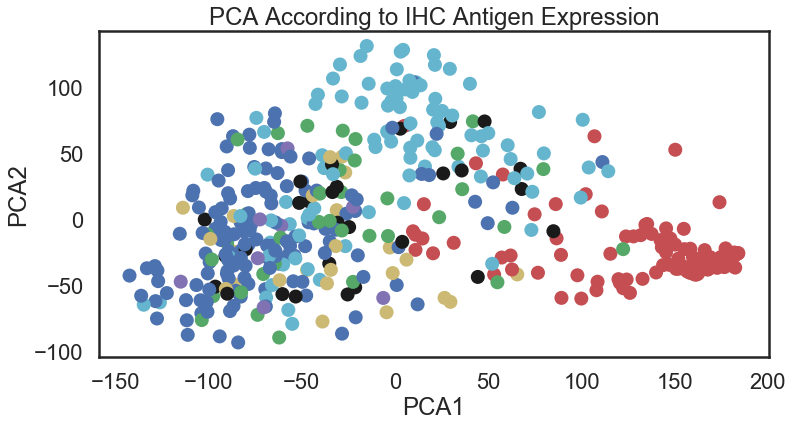

In [317]:
# Now the first two columns of X_pca represent the axes of 
#  greatest variation, so we can plot just those and retain
#  the maximum information.
%matplotlib inline
plt.figure(figsize=(12, 6))
#plt.scatter( X_pca[:,0], X_pca[:,1], c=colors )
plt.title('PCA According to IHC Antigen Expression')
plt.xlabel('PCA1')
plt.ylabel('PCA2'); # so notebook doesn't print the Text object returned by plt.ylabel
plt.scatter( X_pca[:,0], X_pca[:,1], c=colors )

In [247]:
from sklearn.cluster import KMeans

# STEP 1: create and configure the model
# create the classifier object, tell it we are looking for 3 clusters
#  and set the random_state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=10)

# STEP 2: fit the model on the data, using "model.fit"
# learn the cluster assignments
kmeans.fit(grouped_df)

# STEP 3: apply the model to the data, using "model.predict"
# create a new array with the cluster assignments, represented by the integers 0, 1, and 2.
y_kmeans = kmeans.predict(grouped_df)
y_kmeans

ValueError: could not convert string to float: 'Hepatocellular carcinoma'

In [206]:
# Start with importing the packages
%matplotlib notebook

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE
from   sklearn.preprocessing import StandardScaler
import scipy
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [228]:
tsne_df = TSNE(n_components=2, random_state=0, perplexity = 50).fit_transform(grouped_df.loc[:,'ck5':'cd10'])


<IPython.core.display.Javascript object>


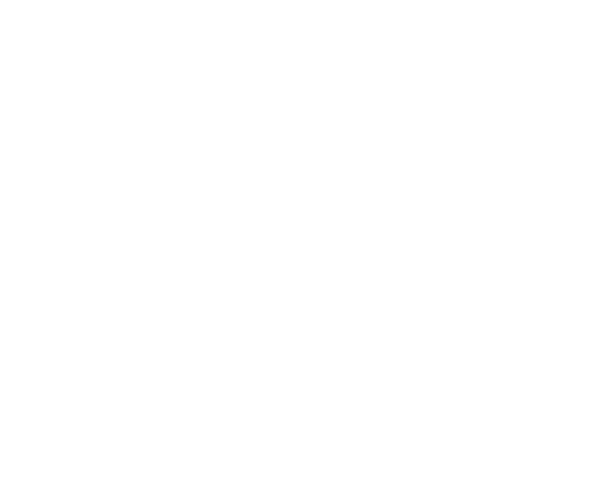

/Users/dgranadi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


In [238]:
# Plotting the data by cell line
plt.figure(figsize=(6, 5))

ax = fig.add_subplot(111)
ax.scatter(tsne_df[grouped_df.clin_diag == 'Ductal pancreatic adenocarcinoma', 0], tsne_df[data_df.clin_diag == 'Ductal pancreatic adenocarcinoma', 1], alpha=0.2,c='b')
ax.scatter(tsne_df[grouped_df.clin_diag == 'Hepatocellular carcinoma', 0], tsne_df[grouped_df.clin_diag == 'Hepatocellular carcinoma', 1], alpha=0.2,c='r')
ax.scatter(tsne_df[grouped_df.clin_diag == 'Gallbladder cancer', 0], tsne_df[grouped_df.clin_diag == 'Gallbladder cancer', 1], alpha=0.2,c='m')
ax.scatter(tsne_df[grouped_df.clin_diag == 'Distal bile duct cancer', 0], tsne_df[grouped_df.clin_diag == 'Distal bile duct cancer', 1], alpha=0.2,c='tab:orange')
ax.scatter(tsne_df[grouped_df.clin_diag == 'Intrahepatic cholangiocarcinoma', 0], tsne_df[grouped_df.clin_diag == 'Intrahepatic cholangiocarcinoma', 1], alpha=0.2,c='grey')
ax.scatter(tsne_df[grouped_df.clin_diag == 'Perihilar cholangiocarcinoma', 0], tsne_df[grouped_df.clin_diag == 'Perihilar cholangiocarcinoma', 1], alpha=0.2,c='olive')
ax.scatter(tsne_df[grouped_df.clin_diag == 'Ampullary carcinoma', 0], tsne_df[grouped_df.clin_diag == 'Ampullary carcinoma', 1], alpha=0.2,c='navy')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
plt.show()

<IPython.core.display.Javascript object>


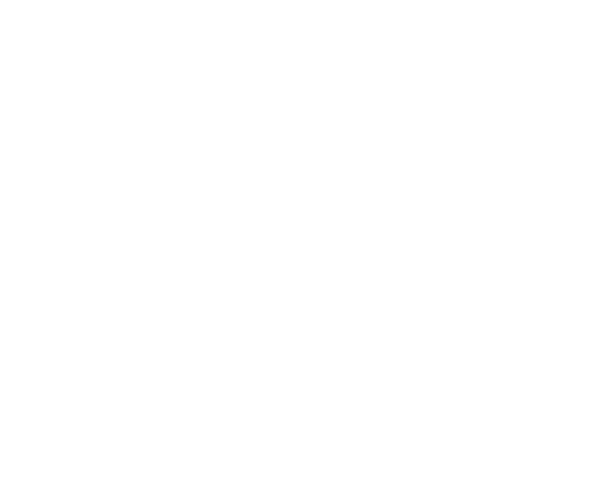

/Users/dgranadi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [219]:
plt.figure(figsize=(6, 5))

ax = fig.add_subplot(111)
ax.scatter(tsne_df[grouped_df.iloc['Ductal pancreatic adenocarcinoma' , , 0], tsne_df[data_df.loc[: , 0] == 'Ductal pancreatic adenocarcinoma', 1], alpha=0.2,c='b')
ax.scatter(tsne_df[grouped_df.loc[: , 0] == 'Hepatocellular carcinoma', 0], tsne_df[grouped_df.loc[: , 0] == 'Hepatocellular carcinoma', 1], alpha=0.2,c='r')
ax.scatter(tsne_df[grouped_df.loc[: , 0] == 'Gallbladder cancer', 0], tsne_df[grouped_df.loc[: , 0] == 'Gallbladder cancer', 1], alpha=0.2,c='m')
ax.scatter(tsne_df[grouped_df.loc[: , 0] == 'Distal bile duct cancer', 0], tsne_df[grouped_df.loc[: , 0] == 'Distal bile duct cancer', 1], alpha=0.2,c='tab:orange')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
plt.show()

In [229]:
grouped_df.columns

Index(['ck5', 'ck7', 'ck17', 'ck18', 'ck19', 'ck20', 'vim', 'muc1', 'muc2',
       'muc5ac', 'muc6', 'berep4', 'ema', 'mcea', 'pcea', 'ca125', 'ca19.9',
       'maspin', 'wt1cyt', 'cdx2', 'p53', 'p63', 'ki67', 'smad4', 'chra',
       'cd56', 'cd10', 'clin_diag'],
      dtype='object')